In [1]:
import os
import pandas as pd
import requests

# Goal
Predict the daily number of cases for the given countries, regions and intervention plan.

This model is described in [From Prediction to Prescription: Evolutionary Optimization of Non-Pharmaceutical Interventions in the COVID-19 Pandemic](https://arxiv.org/abs/2005.13766) in Section 5 - Data-Driven Predictive Model.

Predictions from this model trained on the latest data are visible here: [How AI Makes Intervention Recommendations](https://evolution.ml/demos/npidashboard/). For more information see [Augmenting Human Decision Making
Optimizing COVID-19 Interventions](https://evolution.ml/esp/npi/).

## Intervention plan
An intervention plan consists in a list of containment and closure policies, as well as health system policies. See https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/codebook.md for more details. The following policies are considered:

In [2]:
NPI_COLUMNS = ['C1_School closing',
               'C2_Workplace closing',
               'C3_Cancel public events',
               'C4_Restrictions on gatherings',
               'C5_Close public transport',
               'C6_Stay at home requirements',
               'C7_Restrictions on internal movement',
               'C8_International travel controls',
               'H1_Public information campaigns',
               'H2_Testing policy',
               'H3_Contact tracing',
               'H6_Facial Coverings']

## Example
For the given input, provide a model that can produce the expected output

### Given input
One row represents a country, region and day. For each row, the interventions that were in place on this day for this region and country are provided. Interventions can change from one day to the other for each country and region.

In [3]:
EXAMPLE_INPUT_FILE = "../../../validation/data/2020-09-30_historical_ip.csv"

In [4]:
prediction_input_df = pd.read_csv(EXAMPLE_INPUT_FILE,
                                  parse_dates=['Date'],
                                  dtype={"RegionName": str},
                                  encoding="ISO-8859-1")

In [5]:
prediction_input_df.head()

,CountryName,RegionName,Date,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H6_Facial Coverings
0,Aruba,NaN,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aruba,NaN,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aruba,NaN,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aruba,NaN,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aruba,NaN,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Expected output
For each row that was provided in input, i.e. for each country, region and day, the output should contain an additional `PredictedDailyNewCases` column with the predicted number of cases for that day, region and country. It is possible to leave `PredictedDailyNewCases` empty or NaN, or to remove the row, in case no predition is available.

In [6]:
EXAMPLE_OUTPUT_FILE = "../../../../2020-08-01_2020-08-04_predictions_example.csv"

In [7]:
prediction_output_df = pd.read_csv(EXAMPLE_OUTPUT_FILE,
                                   parse_dates=['Date'],
                                   encoding="ISO-8859-1")

In [8]:
prediction_output_df.head()

,CountryName,RegionName,Date,PredictedDailyNewCases,IsSpecialty
0,Aruba,NaN,2020-08-01,0.820071,0
1,Aruba,NaN,2020-08-02,0.872854,0
2,Aruba,NaN,2020-08-03,0.000000,0
3,Aruba,NaN,2020-08-04,0.000000,0
4,Afghanistan,NaN,2020-08-01,80.590128,0


### Evaluation
Predictions will be evaluated on a period of 4 weeks **after** submision against the actual daily change in confirmed cases reported by the [Oxford COVID-19 Government Response Tracker (OxCGRT)](https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker).

The latest data, including the latest confirmed cases ('ConfirmedCases') can be find here: https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv

In [9]:
DATA_URL = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv'
df = pd.read_csv(DATA_URL,
                 parse_dates=['Date'],
                 encoding="ISO-8859-1",
                 dtype={"RegionName": str,
                        "RegionCode": str},
                 error_bad_lines=False)

In [10]:
df.sample(3)

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
43021,Lebanon,LBN,NaN,NaN,NAT_TOTAL,2020-01-22,0.0,NaN,0.0,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
64624,Seychelles,SYC,NaN,NaN,NAT_TOTAL,2020-10-23,1.0,1.0,0.0,NaN,...,31.48,31.48,41.67,41.67,41.67,41.67,38.46,38.46,62.5,62.5
61639,Somalia,SOM,NaN,NaN,NAT_TOTAL,2020-03-04,0.0,NaN,0.0,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0


### Daily change in confirmed cases
The daily change in confirmed cases can be computed like this:

In [11]:
df["DailyChangeConfirmedCases"] = df.groupby(["CountryName", "RegionName"]).ConfirmedCases.diff().fillna(0)

For instance, for country **United States**, region **California**, the latest available changes in confirmed cases are:

In [12]:
california_df = df[(df.CountryName == "United States") & (df.RegionName == "California")]

In [13]:
california_df[["CountryName", "RegionName", "Date", "ConfirmedCases", "DailyChangeConfirmedCases"]].tail(5)

,CountryName,RegionName,Date,ConfirmedCases,DailyChangeConfirmedCases
71891,United States,California,2020-12-05,1337941.0,27634.0
71892,United States,California,2020-12-06,1366673.0,28732.0
71893,United States,California,2020-12-07,1390828.0,24155.0
71894,United States,California,2020-12-08,1415396.0,24568.0
71895,United States,California,2020-12-09,NaN,0.0


# Training a model

## Copy the data locally

In [14]:
# Main source for the training data
DATA_URL = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv'
DATA_FILE = 'data/OxCGRT_latest.csv'

# Download the data set
data = requests.get(DATA_URL)

# Persist the data set locally in order to use it after submission to make predictions,
# as the sandbox won't have access to the internet anymore.
if not os.path.exists('data'):
    os.mkdir('data')
open(DATA_FILE, 'wb').write(data.content)

19028674

## Train

In [15]:
# Reload the module to get the latest changes
import xprize_predictor
from importlib import reload
reload(xprize_predictor)
from xprize_predictor import XPrizePredictor

In [16]:
predictor = XPrizePredictor(True, DATA_FILE)

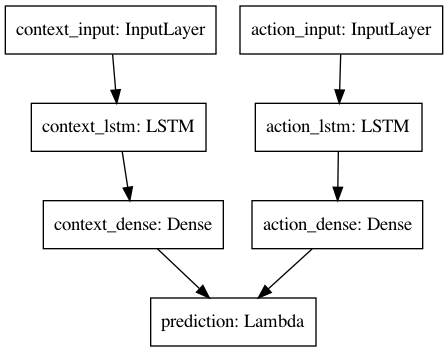

In [17]:
from keras.utils import plot_model

plot_model(predictor.predictor)

In [17]:
%%time
predictor_model = predictor.train()

Creating numpy arrays for Keras for each country...
Numpy arrays created
Trial 0


KeyboardInterrupt: 

In [ ]:
if not os.path.exists('models'):
    os.mkdir('models')
predictor_model.save_weights("models/trained_model_weights.h5")

# Predicting using a trained model

## Load candidate model

In [ ]:
model_weights_file = "models/trained_model_weights.h5"

In [ ]:
predictor = XPrizePredictor(model_weights_file, DATA_FILE)

## Make prediction

In [ ]:
NPIS_INPUT_FILE = "../../../validation/data/2020-09-30_historical_ip.csv"
start_date = "2020-08-01"
end_date = "2020-08-31"

In [ ]:
%%time
preds_df = predictor.predict(start_date, end_date, NPIS_INPUT_FILE)

In [ ]:
preds_df.head()

# Validation
This is how the predictor is going to be called during the competition.  
!!! PLEASE DO NOT CHANGE THE API !!!

In [ ]:
!python predict.py -s 2020-08-01 -e 2020-08-04 -ip ../../../validation/data/2020-09-30_historical_ip.csv -o predictions/2020-08-01_2020-08-04.csv

In [ ]:
!head predictions/2020-08-01_2020-08-04.csv

# Test cases
We can generate a prediction file. Let's validate a few cases...

In [ ]:
# Check the pediction file is valid
import os
from covid_xprize.validation.predictor_validation import validate_submission

def validate(start_date, end_date, ip_file, output_file):
    # First, delete any potential old file
    try:
        os.remove(output_file)
    except OSError:
        pass
    
    # Then generate the prediction, calling the official API
    !python predict.py -s {start_date} -e {end_date} -ip {ip_file} -o {output_file}
    
    # And validate it
    errors = validate_submission(start_date, end_date, ip_file, output_file)
    if errors:
        for error in errors:
            print(error)
    else:
        print("All good!")

## 4 days, no gap
- All countries and regions
- Official number of cases is known up to start_date
- Intervention Plans are the official ones

In [ ]:
validate(start_date="2020-08-01",
         end_date="2020-08-04",
         ip_file="../../../validation/data/2020-09-30_historical_ip.csv",
         output_file="predictions/val_4_days.csv")

## 1 month in the future
- 2 countries only
- there's a gap between date of last known number of cases and start_date
- For future dates, Intervention Plans contains scenarios for which predictions are requested to answer the question: what will happen if we apply these plans?

In [ ]:
%%time
validate(start_date="2021-01-01",
         end_date="2021-01-31",
         ip_file="../../../validation/data/future_ip.csv",
         output_file="predictions/val_1_month_future.csv")

## 180 days, from a future date, all countries and regions
- Prediction start date is 1 week from now. (i.e. assuming submission date is 1 week from now)  
- Prediction end date is 6 months after start date.  
- Prediction is requested for all available countries and regions.  
- Intervention plan scenario: freeze last known intervention plans for each country and region.  

As the number of cases is not known yet between today and start date, but the model relies on them, the model has to predict them in order to use them.  
This test is the most demanding test. It should take less than 1 hour to generate the prediction file.

### Generate the scenario

In [ ]:
from datetime import datetime, timedelta

start_date = datetime.now() + timedelta(days=7)
start_date_str = start_date.strftime('%Y-%m-%d')
end_date = start_date + timedelta(days=180)
end_date_str = end_date.strftime('%Y-%m-%d')
print(f"Start date: {start_date_str}")
print(f"End date: {end_date_str}")

In [ ]:
from covid_xprize.validation.scenario_generator import get_raw_data, generate_scenario, NPI_COLUMNS
DATA_FILE = 'data/OxCGRT_latest.csv'
latest_df = get_raw_data(DATA_FILE, latest=True)
scenario_df = generate_scenario(start_date_str, end_date_str, latest_df, countries=None, scenario="Freeze")
scenario_file = "predictions/180_days_future_scenario.csv"
scenario_df.to_csv(scenario_file, index=False)
print(f"Saved scenario to {scenario_file}")

### Check it

In [ ]:
%%time
validate(start_date=start_date_str,
         end_date=end_date_str,
         ip_file=scenario_file,
         output_file="predictions/val_6_month_future.csv")